In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler

### I denna undersökning ska kunder analyseras och prediktioner på vilka som lämnar (churnar) ska göras. Ett neuralt nätverk skall användas för att göra prediktionerna

In [266]:
def any_duplicates(data:str) -> str:
    """
        Prints whether or not there are duplicates.
    """
    import pandas as pd
    
    list_with_false_true = pd.DataFrame.duplicated(data)
    any_true = list_with_false_true.any()
    if any_true:
        print("Number of duplicates: ", list_with_false_true.value_counts()[1] )
    else:
        print("No duplicates found")

### Läser av datasetet

In [267]:
churn_test_df = pd.read_csv("C:/Users/danij/OneDrive/Machine Learning/Matematik/LinearRegression/Uppgift8/churn_test2.csv")
churn_train_df = pd.read_csv("C:/Users/danij/OneDrive/Machine Learning/Matematik/LinearRegression/Uppgift8/churn_train2.csv")

### Analyserar churn_train datan
Datan har 21 attribut och 5634 st personer.
Hittade inga dubletter eller konstiga värden. Dock har den saknade värden i "TotalCharges" som måste fixas

In [268]:
churn_train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1768-ZAIFU,Female,1,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,25.20,25.2,Yes
1,2159-TURXX,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),20.05,95.55,No
2,8261-GWDBQ,Female,1,Yes,No,60,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),116.05,6925.9,No
3,2732-ISEZX,Female,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.50,104.3,No
4,7607-QKKTJ,Male,0,Yes,Yes,45,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,One year,Yes,Credit card (automatic),95.00,4368.85,No


In [269]:
churn_train_df.shape

(5634, 21)

In [270]:
churn_train_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [271]:
churn_train_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [272]:
churn_train_df.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [273]:
any_duplicates(churn_train_df)

No duplicates found


In [274]:
for column in churn_train_df.columns:
    print( column,  len(churn_train_df[churn_train_df[column] == ' '].index) )

customerID 0
gender 0
SeniorCitizen 0
Partner 0
Dependents 0
tenure 0
PhoneService 0
MultipleLines 0
InternetService 0
OnlineSecurity 0
OnlineBackup 0
DeviceProtection 0
TechSupport 0
StreamingTV 0
StreamingMovies 0
Contract 0
PaperlessBilling 0
PaymentMethod 0
MonthlyCharges 0
TotalCharges 8
Churn 0


<AxesSubplot:>

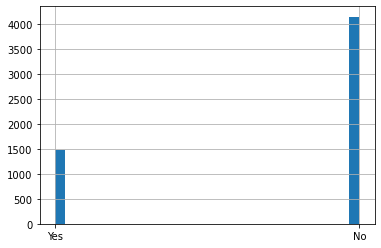

In [275]:
churn_train_df["Churn"].hist(bins=30)

### Analyserar churn_test datan

Datan har också 21 attribut men mindre antal personer, 1409 st.
Hittade inga dubletter eller konstiga värden här heller,  dock har den också saknade värden i "TotalCharges" som skall fixas.

In [276]:
churn_test_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9505-SQFSW,Female,0,Yes,Yes,3,No,No phone service,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,40.30,92.5,No
1,1723-HKXJQ,Male,0,No,No,42,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.75,4273.45,Yes
2,9154-QDGTH,Male,0,Yes,Yes,43,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),104.30,4451.85,No
3,8309-IEYJD,Female,1,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.60,70.6,No
4,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes


In [277]:
churn_test_df.shape

(1409, 21)

In [278]:
churn_test_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [279]:
churn_test_df.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [280]:
any_duplicates(churn_test_df)

No duplicates found


In [281]:
for column in churn_test_df.columns:
    print( column,  len(churn_test_df[churn_test_df[column] == ' '].index)) 

customerID 0
gender 0
SeniorCitizen 0
Partner 0
Dependents 0
tenure 0
PhoneService 0
MultipleLines 0
InternetService 0
OnlineSecurity 0
OnlineBackup 0
DeviceProtection 0
TechSupport 0
StreamingTV 0
StreamingMovies 0
Contract 0
PaperlessBilling 0
PaymentMethod 0
MonthlyCharges 0
TotalCharges 3
Churn 0


<AxesSubplot:>

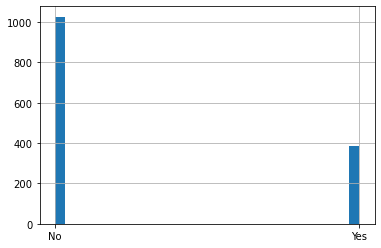

In [282]:
churn_test_df["Churn"].hist(bins=30)

### Förberedning av datan

Ändrar null/saknade värden från "TotalCharges" till 0 och tar bort "customerID" då den inte gör nytta i undersökningen. 

In [283]:
churn_train_df['TotalCharges'] = churn_train_df.TotalCharges.replace({' ': 0})
churn_train_df['TotalCharges'] = pd.to_numeric(churn_train_df.TotalCharges, errors='coerce')

churn_train_df = churn_train_df.drop('customerID', axis=1)

In [284]:
churn_test_df['TotalCharges'] = churn_test_df.TotalCharges.replace({' ': 0})
churn_test_df['TotalCharges'] = pd.to_numeric(churn_test_df.TotalCharges, errors='coerce')

churn_test_df = churn_test_df.drop('customerID', axis=1)

### Delar upp datan i x och y train, respektive x och y test

In [285]:
x_train = churn_train_df.drop(columns= "Churn")
y_train = churn_train_df["Churn"]

x_test = churn_test_df.drop(columns="Churn")
y_test = churn_test_df["Churn"]

### One hot encodar datasetet


In [286]:
churn_train_df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1499
TotalCharges        5290
Churn                  2
dtype: int64

In [287]:
churn_test_df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges       809
TotalCharges        1373
Churn                  2
dtype: int64

In [288]:
# generate the list of categorical and numerical variables
categorical_variables = churn_train_df.nunique()[churn_train_df.nunique() < 5].keys().to_list()

numerical_variables=list(set(churn_train_df.columns) - set(categorical_variables))
categorical_variables.remove('Churn')
############################################
categorical_variables = churn_test_df.nunique()[churn_test_df.nunique() < 5].keys().to_list()

numerical_variables=list(set(churn_test_df.columns) - set(categorical_variables))
categorical_variables.remove('Churn')

ohe = OneHotEncoder(drop='first', sparse=False)

X_train_ohe = ohe.fit_transform(x_train[categorical_variables])
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(categorical_variables))

# Transform only without fitting
X_test_ohe = ohe.transform(x_test[categorical_variables])
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names(categorical_variables))


scaler = StandardScaler()
X_train_sc = scaler.fit_transform(x_train[numerical_variables])
X_train_sc_df = pd.DataFrame(X_train_sc, columns=numerical_variables)

# Transform only without fitting
X_test_sc = scaler.transform(x_test[numerical_variables])
X_test_sc_df = pd.DataFrame(X_test_sc, columns=numerical_variables)

# Merging the transformed dataframe togheter
x_train = pd.merge(X_train_ohe_df, X_train_sc_df, left_index=True, right_index=True)
x_test = pd.merge(X_test_ohe_df, X_test_sc_df, left_index=True, right_index=True)

c:\Users\danij\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\danij\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [289]:
y_test = y_test.replace({'No': 0, 'Yes':1})
y_train = y_train.replace({'No': 0, 'Yes':1})

### Tränar 5 st MLPClassifier modeller

In [290]:
mlp_clf_1 = MLPClassifier(learning_rate_init= 0.01, hidden_layer_sizes = (5,5,5,5), random_state=42)
mlp_clf_1.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5, 5, 5), learning_rate_init=0.01,
              random_state=42)

In [291]:
mlp_clf_2 = MLPClassifier(learning_rate_init= 0.01, hidden_layer_sizes = (100,100), random_state=42)
mlp_clf_2.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100), learning_rate_init=0.01,
              random_state=42)

In [292]:
mlp_clf_3 = MLPClassifier(learning_rate_init= 0.01, hidden_layer_sizes = (100,100,100,100,100,100,100,100,100,100), random_state=42)
mlp_clf_3.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100, 100,
                                  100),
              learning_rate_init=0.01, random_state=42)

In [297]:
mlp_clf_4 = MLPClassifier(learning_rate_init= 0.0001, hidden_layer_sizes = (100,100), random_state=42)
mlp_clf_4.fit(x_train, y_train)

c:\Users\danij\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100), learning_rate_init=0.0001,
              random_state=42)

In [298]:
mlp_clf_5 = MLPClassifier(learning_rate_init= 0.00001, hidden_layer_sizes = (100,100), random_state=42)
mlp_clf_5.fit(x_train, y_train)

c:\Users\danij\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100), learning_rate_init=1e-05,
              random_state=42)

### Tid analys

MLPClassifier 1 <br>
tid: 2.9 sekunder <br>


MLPClassifier 2 <br>
tid: 8.6 sekunder <br>


MLPClassifier 3 <br>
tid: 43.3 sekunder <br>


MLPClassifier 4 <br>
tid: 18.4 sekunder <br>


MLPClassifier 5 <br>
tid: 17.9 sekunder <br>

Den som tog minst tid var klassifieraren nummer 1 och den som tog mest tid var nummer 3. Om vi jämför dessa två så kan vi dra slutsatsen att antal gömda lager och antal neuroner spelar roll för hur långt tid det behövs för att köra klart dem två. Klassifieraren nummer 1 har 4 st gömda lager och i varje lager 5 st neuroner. Medan klassifieraren nummer 3 har 10 gömda lager men 100 st neuroner i varje lager. Summan av antal neuroner blir då 20st i klassifieraren 1 och 1000 st i klassifieraren 3. Där har vi en stor skillnad i antal neuroner och därför finns det en stor skillnad i tiden.

Dock om vi jämför klassifieraren nummer 4 och 5, då kan vi se att dem har samma antal gömda lager och antal neuroner i varje lager. I det här fallet är det "learning_rate_init" som gör att tiden för dem två skiljer sig med ett par tiondelsekunder. Klassifieraren nummer 4 har 0.0001 i learning_rate_init, och därför tog det lite mer tid att köra den. Medan klassifieraren nummer 5 har 0.00001 i learning_rate_init och därför har det tagit lite mindre tid.


### Accuracy score
Ligger mellan 0.74 och 0.79 vilket är bra score. Det behövs lite ändringar i modellen för att man ska få ett bättre accuracy och på detta sätt ett bättre och mer pålitlig modell.

In [295]:
print("MLPClassifier 1:", mlp_clf_1.score(x_test, y_test))
print("MLPClassifier 2:", mlp_clf_2.score(x_test, y_test))
print("MLPClassifier 3:", mlp_clf_3.score(x_test, y_test))
print("MLPClassifier 4:", mlp_clf_4.score(x_test, y_test))
print("MLPClassifier 5:", mlp_clf_5.score(x_test, y_test))


MLPClassifier 1: 0.7835344215755855
MLPClassifier 2: 0.7501774308019872
MLPClassifier 3: 0.7494677075940384
MLPClassifier 4: 0.7828246983676366
MLPClassifier 5: 0.7934705464868701


### Confusion Matrix
Med confusion matrix kan vi bekräfta att accuracy score har rätt vad gäller prediktioner på våra 5 modeller. MLP Classifier 5 har minst accuracy score och däremot har prediktad mest fel. Och MLP Classifier 2 har högst accuracy score och därför mest rätt prediktade svar. 

c:\Users\danij\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


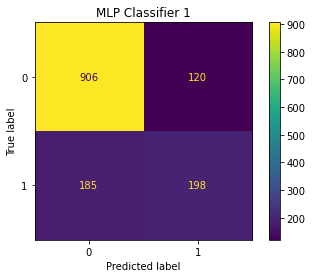

c:\Users\danij\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


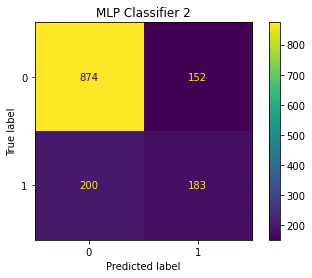

c:\Users\danij\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


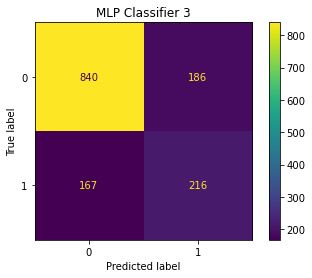

c:\Users\danij\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


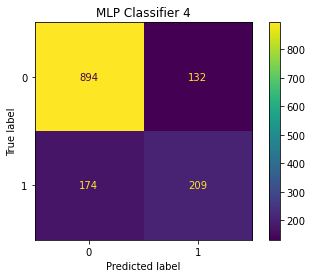

c:\Users\danij\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


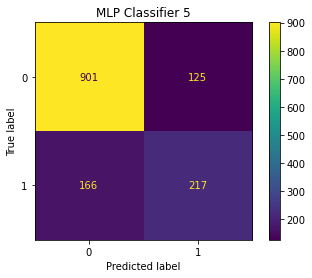

In [296]:
lista_med_modeller = [mlp_clf_1, mlp_clf_2, mlp_clf_3, mlp_clf_4, mlp_clf_5]
nummer = 1

for modell in lista_med_modeller:
    plot_confusion_matrix(modell, x_test, y_test)
    plt.title(f"MLP Classifier {nummer}")
    plt.show()
    nummer = nummer + 1

#### MLP Classifier 1
Prediktade 120 st på 1 då den riktiga svaret är 0, och 185 st på 0 då den riktiga svaret är 1. <br> 
Summan av totalt fel: 305 st <br> 
Andel fel i procent: 21.6%

#### MLP Classifier 2
Prediktade 152 st på 1 då den riktiga svaret är 0, och 200 st på 0 då den riktiga svaret är 1. <br> 
Summan av totalt fel: 352 st <br> 
Andel fel i procent: 25%

#### MLP Classifier 3
Prediktade 186 st på 1 då den riktiga svaret är 0, och 167 st på 0 då den riktiga svaret är 1. <br> 
Summan av totalt fel: 353 st <br> 
Andel fel i procent: 25%

#### MLP Classifier 4
Prediktade 132 st på 1 då den riktiga svaret är 0, och 174 st på 0 då den riktiga svaret är 1. <br> 
Summan av totalt fel: 306 st <br> 
Andel fel i procent: 21.7%
 
#### MLP Classifier 5
Prediktade 125 st på 1 då den riktiga svaret är 0, och 166 st på 0 då den riktiga svaret är 1. <br> 
Summan av totalt fel: 291 st <br> 
Andel fel i procent: 20.6%
